Load the Dataset

In [1]:
%pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/22/47/9350b2eeeaef8c0fd3ec3505c8a0481b576845b3df0d71c76f989c23d3c6/ucimlrepo-0.0.6-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [391]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [62]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
features = adult.data.features 
targets = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [63]:
# Install required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Concatenate features and target
dataset = pd.concat([features, targets], axis=1)

In [91]:
# make a copy of the dataset
data = dataset.copy()
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [67]:
# Checking the data shape
data.shape

(48842, 15)

In [68]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [70]:
# Checking null values
data.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [73]:
# Identify unique values in categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        unique_values = data[column].unique()
        print(f"\n{column}: \n{unique_values}")


workclass: 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

education: 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status: 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation: 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

relationship: 
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race: 
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex: 
['Male' 'Female']

native-country: 
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico

In [74]:
data.isin({'?'}).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [75]:
# Replace "?" with NaN
data.replace("?", np.nan, inplace=True)

In [76]:
data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [77]:
data.shape

(48842, 15)

In [78]:
# Drop rows with missing values
data.dropna(inplace=True)

In [79]:
data.shape

(45222, 15)

In [80]:
# Check for duplicate
data.duplicated().sum()

28

In [81]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [82]:
# Verify
data.duplicated().sum()

0

In [83]:
# Check shape
data.shape

(45194, 15)

# I have dropped appr. 7.5% rows since they contained duplicates and missing values. I didn't use techniques like replacing them with mean and mode here. Because it may introduce bias when training.

In [84]:
# Replace "<=50K." with "<=50K"
data.replace("<=50K.", "<=50K", inplace=True)

# Replace ">50K." with ">50K"
data.replace(">50K.", ">50K", inplace=True)

In [85]:
data['income'].value_counts()

income
<=50K    33988
>50K     11206
Name: count, dtype: int64

In [86]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset with the 'income' column
# 'income' column: <=50K --> 33988, >50K --> 11206

# Separate the majority and minority classes
majority_class = data[data['income'] == '<=50K']
minority_class = data[data['income'] == '>50K']

# Sample the majority class to match the size of the minority class
under_sampled_majority = majority_class.sample(n=len(minority_class), random_state=42)

# Concatenate the under sampled majority class with the minority class
under_sampled_data = pd.concat([under_sampled_majority, minority_class])

# # Shuffle the under sampled data (optional)
# under_sampled_data = under_sampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after under sampling
print(under_sampled_data['income'].value_counts())


income
<=50K    11206
>50K     11206
Name: count, dtype: int64


# I dropped the education column since it was parallel with the education-num column

In [87]:
# dropping education column
under_sampled_data = under_sampled_data.drop(columns = ['education'])

In [90]:
under_sampled_data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
9733,69,Private,102874,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,24,United-States,<=50K
1741,45,Private,98881,7,Married-civ-spouse,Other-service,Wife,White,Female,0,0,32,United-States,<=50K
36537,49,Federal-gov,276309,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
18740,44,Self-emp-inc,37997,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
39672,24,Self-emp-not-inc,216889,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48813,60,Private,117909,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
48815,38,Private,149347,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
48816,43,Local-gov,23157,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K
48822,40,Private,202168,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50K


# Label Encoding

In [92]:
en_data = under_sampled_data.copy()

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

en_data['workclass'] = le.fit_transform(en_data['workclass'])
en_data['marital-status'] = le.fit_transform(en_data['marital-status'])
en_data['occupation'] = le.fit_transform(en_data['occupation'])
en_data['relationship'] = le.fit_transform(en_data['relationship'])
en_data['race'] = le.fit_transform(en_data['race'])
en_data['sex'] = le.fit_transform(en_data['sex'])
en_data['native-country'] = le.fit_transform(en_data['native-country'])
en_data['income'] = le.fit_transform(en_data['income'])

In [94]:
en_data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
9733,69,2,102874,9,6,0,1,4,0,0,0,24,38,0
1741,45,2,98881,7,2,7,5,4,0,0,0,32,38,0
36537,49,0,276309,10,0,3,1,4,1,0,0,40,38,0
18740,44,3,37997,9,2,4,0,4,1,0,0,60,38,0
39672,24,4,216889,5,2,2,0,4,1,0,0,45,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48813,60,2,117909,11,2,9,0,4,1,7688,0,40,38,1
48815,38,2,149347,14,2,9,0,4,1,0,0,50,38,1
48816,43,1,23157,14,2,3,0,4,1,0,1902,50,38,1
48822,40,2,202168,15,2,9,0,4,1,15024,0,55,38,1


In [95]:
corr = en_data.corr()
corr

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.082455,-0.069747,0.076407,-0.251944,0.003927,-0.234431,0.033200,0.120295,0.088357,0.059544,0.083514,0.006587,0.285042
workclass,0.082455,1.000000,-0.030965,0.046897,-0.024386,0.023435,-0.050119,0.044957,0.062635,0.046971,0.016989,0.056602,-0.000566,0.021347
fnlwgt,-0.069747,-0.030965,1.000000,-0.033623,0.026835,0.004279,0.001505,-0.021884,0.024452,-0.005317,-0.000218,-0.016023,-0.047243,-0.013129
education-num,0.076407,0.046897,-0.033623,1.000000,-0.088041,0.107139,-0.108351,0.039503,0.049071,0.144336,0.097241,0.165965,0.059516,0.379881
marital-status,-0.251944,-0.024386,0.026835,-0.088041,1.000000,0.012742,0.166110,-0.063726,-0.145727,-0.042027,-0.036977,-0.172811,-0.027299,-0.248503
occupation,0.003927,0.023435,0.004279,0.107139,0.012742,1.000000,-0.058078,0.011984,0.057138,0.021749,0.021102,0.030518,0.001560,0.055328
relationship,-0.234431,-0.050119,0.001505,-0.108351,0.166110,-0.058078,1.000000,-0.105711,-0.667209,-0.050441,-0.056078,-0.268403,-0.021625,-0.287176
race,0.033200,0.044957,-0.021884,0.039503,-0.063726,0.011984,-0.105711,1.000000,0.093065,0.011839,0.018061,0.050722,0.156650,0.081477
sex,0.120295,0.062635,0.024452,0.049071,-0.145727,0.057138,-0.667209,0.093065,1.000000,0.046181,0.049516,0.243970,0.010687,0.269036
capital-gain,0.088357,0.046971,-0.005317,0.144336,-0.042027,0.021749,-0.050441,0.011839,0.046181,1.000000,-0.050491,0.095871,0.009189,0.182625


<Axes: >

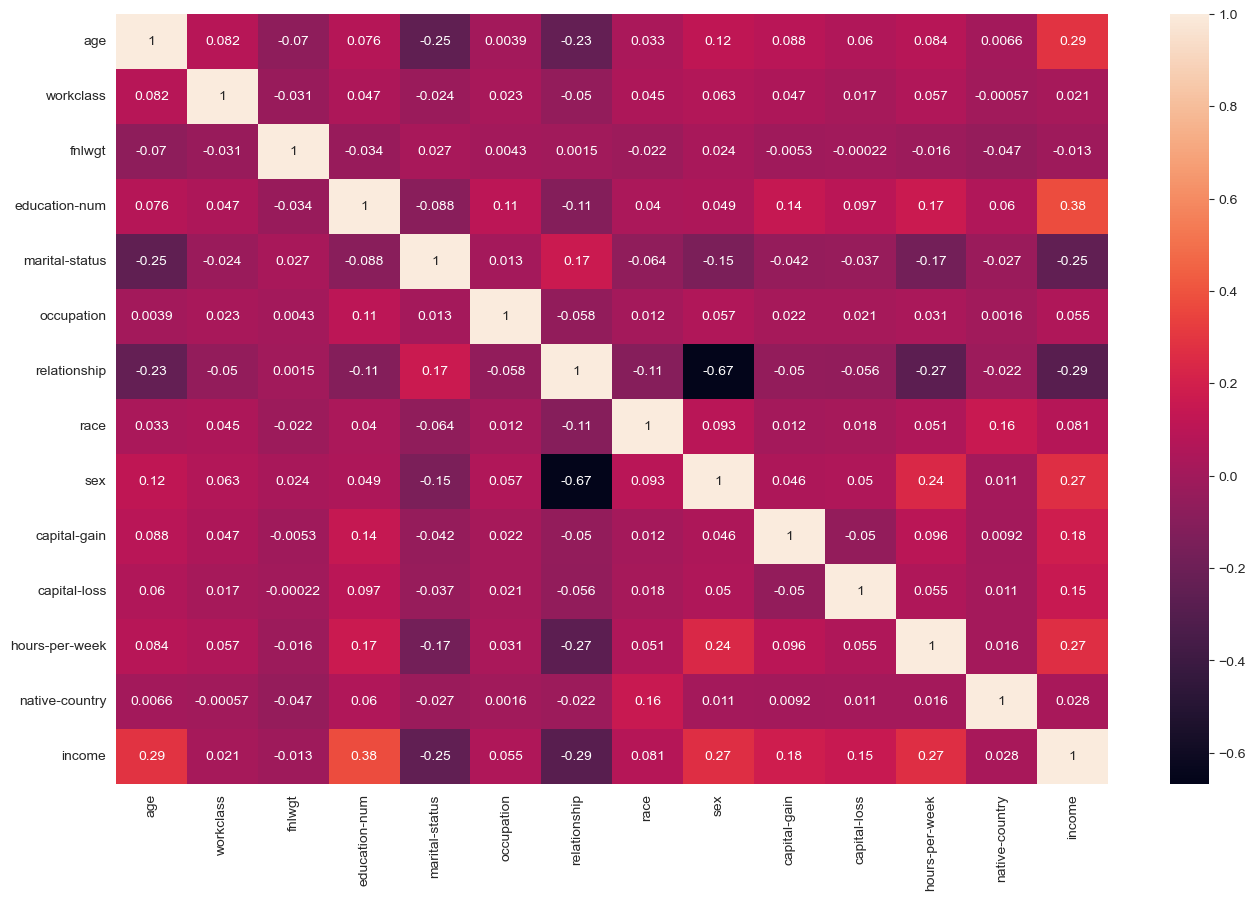

In [96]:
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'income'}>, <Axes: >, <Axes: >]],
      dtype=object)

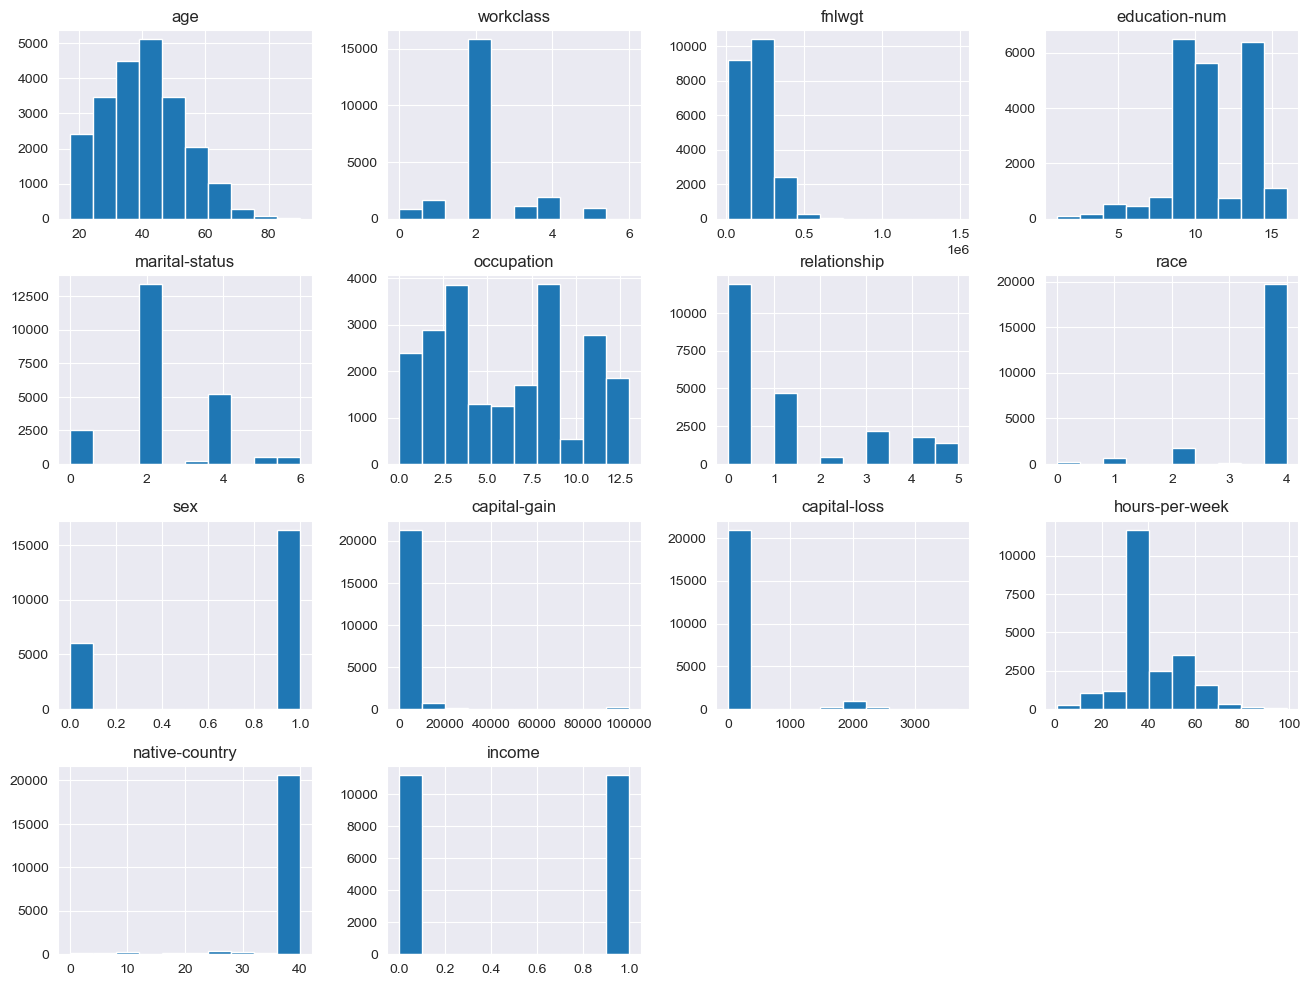

In [97]:
en_data.hist(figsize=(16,12), sharex=False)

In [98]:
# dropping columns with negative correlations
en_data = en_data.drop(columns = ['fnlwgt','marital-status', 'relationship'])

In [99]:
en_data

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
9733,69,2,9,0,4,0,0,0,24,38,0
1741,45,2,7,7,4,0,0,0,32,38,0
36537,49,0,10,3,4,1,0,0,40,38,0
18740,44,3,9,4,4,1,0,0,60,38,0
39672,24,4,5,2,4,1,0,0,45,38,0
...,...,...,...,...,...,...,...,...,...,...,...
48813,60,2,11,9,4,1,7688,0,40,38,1
48815,38,2,14,9,4,1,0,0,50,38,1
48816,43,1,14,3,4,1,0,1902,50,38,1
48822,40,2,15,9,4,1,15024,0,55,38,1


In [100]:
X = en_data.drop('income', axis=1)
y = en_data['income']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)

In [102]:
X_train.shape, X_test.shape

((17929, 10), (4483, 10))

In [103]:
def model_accuracy(model):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(str(model) + '--->' + str(accuracy))

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_accuracy(rf)

RandomForestClassifier()--->0.7633281284853892


In [105]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_accuracy(nb)

GaussianNB()--->0.62368949364265


In [106]:
from sklearn.metrics import accuracy_score, classification_report

# Generate predictions for Random Forest
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2223
           1       0.76      0.77      0.77      2260

    accuracy                           0.76      4483
   macro avg       0.76      0.76      0.76      4483
weighted avg       0.76      0.76      0.76      4483


In [107]:
# Generate predictions for Naive Bayes
y_pred_nb = nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.57      0.94      0.71      2223
           1       0.85      0.31      0.45      2260

    accuracy                           0.62      4483
   macro avg       0.71      0.63      0.58      4483
weighted avg       0.71      0.62      0.58      4483
